# Let's try to get Gang's plots reproduced

In [11]:
import matplotlib.pyplot as plt
import uproot
import csv
import numpy as np
import combineHistos

In [30]:
def get_data(filename, importantColumn=1, delr = ' '):
    output = []
    with open(filename) as file:
        line_reader = []
        if delr=='':
            line_reader = csv.reader(file)
        else:
            line_reader = csv.reader(file, delimiter=delr)
        for row in line_reader:
            output.append(float(row[importantColumn]))
    return np.array(output)

def  get_epsilon(sigIn, path_to_eff, datg, dtyp):
    # I'm not entirely sure what cut efficiency He pulls, so I'll just do the ratio of the first to the last for now
    # efficiencies = get_data(path_to_eff, importantColumn=0, delr=' ')
    # # print(efficiencies)
    # epsee = 6e-3 if typ=='JF' else 1
    # print(sigIn*(efficiencies[-1]/efficiencies[0])*(10**3)*35.9 * epsee)
    # return sigIn*(efficiencies[-1]/efficiencies[0])*(10**3)*35.9 * epsee
    epsilsons = {'ZZ': 301.185,
                 'WZ': 215.361,
                 'ttbarJF': 82.2581,
                 'W3j': 707.111}
    return epsilsons[dtyp]

def to_plot(datasDict, eff_path_dict, datgr):
    sigs = {'JF':{'ttbarJF':63.83, 'W3j':380.8}, 
            'diboson':{'WZ':24.61, 'ZZ':35.19}}
    # print(datasDict)
    # epsilons = []
    # for dt in datasDict:
    #     thisEps = get_epsilon(sigs[datgr][dt], eff_path_dict[dt], datgr)
    #     epsilons.append(thisEps)
    # print("hello", epsilons)
    # print([get_epsilon(sigs[datgr][dt], eff_path_dict[dt], datgr)*datasDict[dt] for dt in datasDict])
    return (1.3 if datgr=='diboson' else 1) * np.sum(np.array([get_epsilon(sigs[datgr][dt], eff_path_dict[dt], datgr, dt)*datasDict[dt] for dt in datasDict]), axis=0)

def diboson_plot(datasDict,eff_path_dict):
    sig_WZ = 24.61
    sig_ZZ = 35.19 # check if these match with what I had found
    return 1.3 * (get_epsilon(sig_WZ, eff_path_dict['WZ'], 'diboson') * datasDict['WZ'] + get_epsilon(sig_ZZ, eff_path_dict['ZZ'], 'diboson')*datasDict['ZZ'])
    
def JF_plot(datasDict,eff_path_dict):
    sig_ttbar = 63.83
    sig_W3j = 380.8# 408.7 for 14TeV # check if these match with what I had found
    return (get_epsilon(sig_ttbar, eff_path_dict['ttbarJF'], 'JF') * datasDict['ttbarJF'] + get_epsilon(sig_W3j, eff_path_dict['W3j'], 'JF')*datasDict['W3j'])

def file_path_formatting(inDir, tag, dtp, is_dib):
    # print(dtp)
    return inDir + tag + ('jj' if is_dib else '') + dtp+ ('_ee' if not is_dib else '')+ '.dat'

In [31]:
path_to_Gang = '/Users/dysonk/Work/Gang_analysis/'
gang_diboson_path = 'prompt_NR_highSR1/'

# WZ_Gang_raw_mllWj_file_name = path_to_Gang+gang_diboson_path+'Mll_jjWZ.dat'
# WZ_MllWj_raw_Masses = get_data(WZ_Gang_raw_mllWj_file_name)
# eps_WZ = get_epsilon(sig_WZ, path_to_Gang+gang_diboson_path+'cut_eff_jjWZ.dat')
# ZZ_Gang_raw_mllWj_file_name = path_to_Gang+gang_diboson_path+'Mll_jjZZ.dat'
# ZZ_MllWj_raw_Masses = get_data(ZZ_Gang_raw_mllWj_file_name)
# eps_ZZ = get_epsilon(sig_ZZ, path_to_Gang+gang_diboson_path+'cut_eff_jjZZ.dat')


CMS_mllWj1_file_name = path_to_Gang+gang_diboson_path+'mllW_1.dat'
CMS_mllWj3_file_name = path_to_Gang+gang_diboson_path+'mllW_3.dat'
CMS_to_plot = get_data(CMS_mllWj3_file_name) - get_data(CMS_mllWj1_file_name)

# print(WZ_MllWj_raw_Masses)
# with open(WZ_Gang_raw_mllWj_file_name) as File:
#     Line_reader = csv.reader(File, delimiter=' ')
#     for row in Line_reader:
#         WZ_MllWj_raw_Masses.append(float(row[1]))



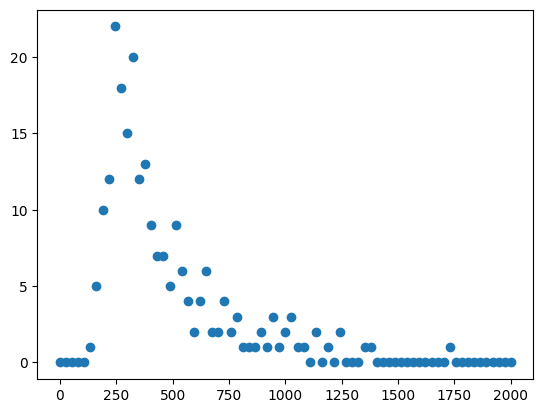

In [32]:

fromWZ = combineHistos.get_data('WZ2j', 'Mass_2jW2l','/Users/dysonk/Work/new/AnalysisOutput/')
plt.scatter(np.linspace(fromWZ['bounds'][0], fromWZ['bounds'][1], len(fromWZ['data'])), fromWZ['data'])

[ 0.         0.         0.         0.         0.         2.15361
 10.76805   21.5361    25.843319  47.37942   38.76498   32.30415
 43.0722    25.843319  27.99693   19.38249   15.07527   15.07527
 10.76805   19.38249   12.921659   8.61444    4.30722    8.61444
 12.921659   4.30722    4.30722    8.61444    4.30722    6.4608297
  2.15361    2.15361    2.15361    4.30722    2.15361    6.4608297
  2.15361    4.30722    6.4608297  2.15361    2.15361    0.
  4.30722    0.         2.15361    0.         4.30722    0.
  0.         0.         2.15361    2.15361    0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         2.15361    0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.       ]
[ 0.         0.         0.         0.         0.         2.15361
 22.81545   42.61905   71.02107   83.52162   77.91904   83.5056
 73.190704  64.997375  43.05618   37.45359   21.09897   21.09897
 28.83915   25.40

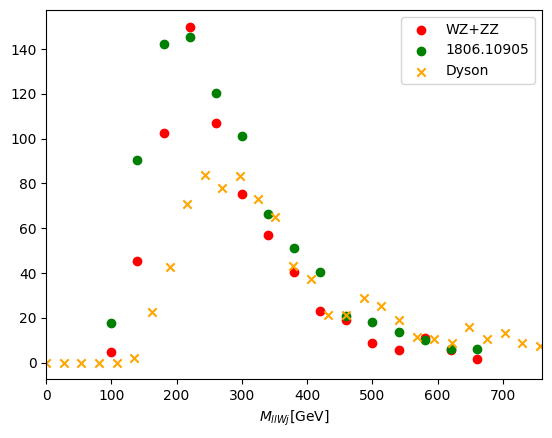

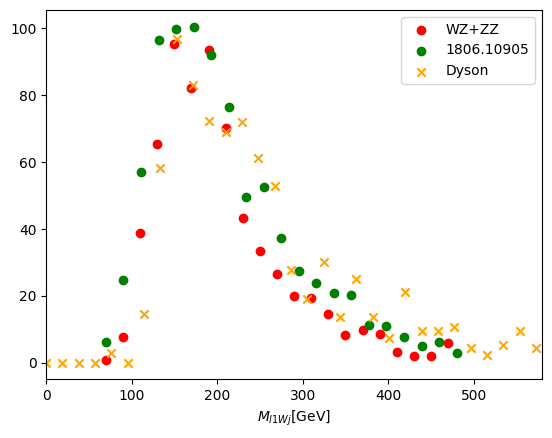

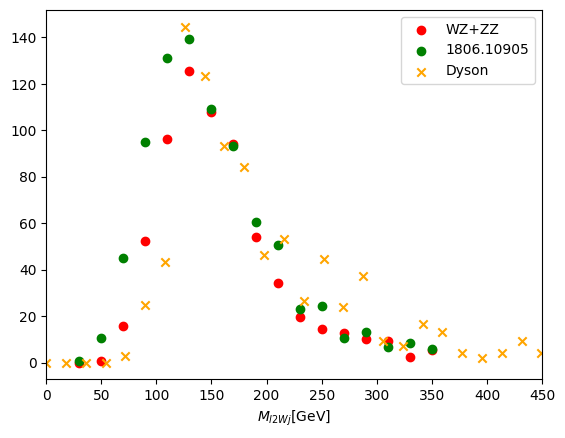

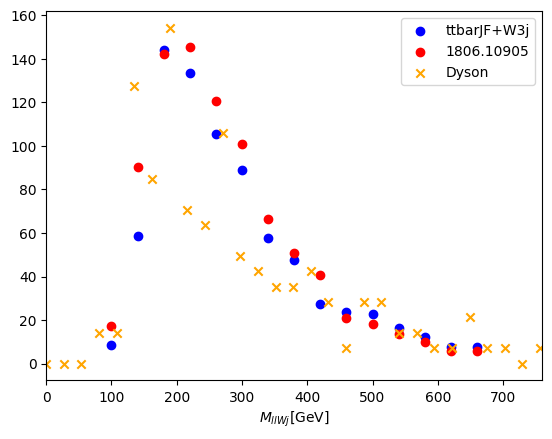

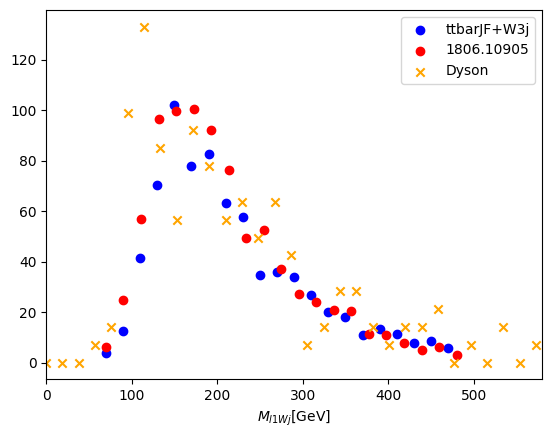

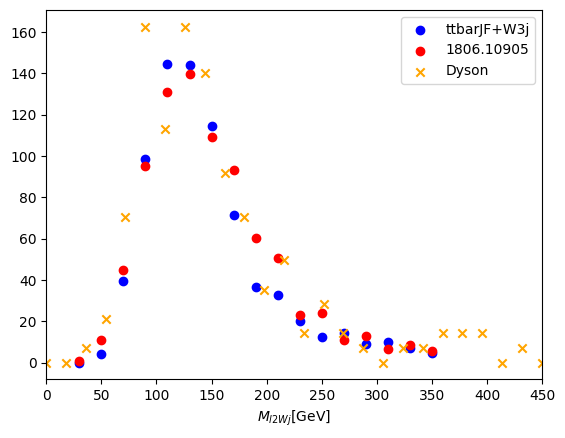

In [34]:
GangFileTags = {'ll':'MllW_',
                 'l1':'Ml1W_',
                 'l2':'Ml2W_'}
CMSFileTags = {'ll': 'mllW_',
               'l1': 'ml1W_',
               'l2': 'ml2W_'}
plotTitles = {'ll': '$M_{llWj}$',
              'l1': '$M_{l1Wj}$',
              'l2': '$M_{l2Wj}$'}
plot_lc = {'diboson': {'label':'WZ+ZZ', 'color':'red', 'CMScolor':'green'},
               'JF': {'label':'ttbarJF+W3j', 'color':'blue', 'CMScolor':'red'}}

CMS_linspaces = {'ll': np.linspace(100, 660, 15),
                 'l1': np.linspace(70, 480, 21), 
                 'l2': np.linspace(30, 350, 17)}
GangdatGroups = {'diboson': ['WZ', 'ZZ'], 'JF': ['ttbarJF', 'W3j']}
MydatGroups = {'diboson': ['WZ2j', 'ZZ2j'], 'JF': ['ttbar', 'W3j']}
gang_paths = {'diboson':'prompt_NR_highSR1/',
              'JF': 'jetfake_NR_highSR1/'}
my_start_dir = '/Users/dysonk/Work/new/AnalysisOutput/'
my_FileTags = {'ll': 'Mass_2jW2l',
               'l1': 'Mass_2jW1l0',
               'l2': 'Mass_2jW1l1'}

my_scale_factor = {'ZZ2j': 301.185e-2,
                 'WZ2j': 215.361e-2,
                 'ttbar': 82.2581/2,
                 'W3j': 707.111e-2}
for dg in GangdatGroups:
    init_dir = path_to_Gang+gang_paths[dg]

    for htyp in GangFileTags:
        is_dibson = True if dg=='diboson' else False
        # print(is_dibson)
        fig, axes = plt.subplots()
        dattypes = GangdatGroups[dg]
        GangFileNames = {dtyp: file_path_formatting(init_dir, GangFileTags[htyp], dtyp, is_dibson) for dtyp in dattypes}
        # print(GangFileNames)
        datas = {dtyp: get_data(GangFileNames[dtyp]) for dtyp in dattypes}
        efficiencies = {dtyp: file_path_formatting(init_dir, GangFileTags[htyp], dtyp, is_dibson) for dtyp in dattypes}
        theseMasses = to_plot(datas, efficiencies, dg)
        Mass_range = get_data(GangFileNames[GangdatGroups[dg][0]], importantColumn=0)
        axes.set_xlabel(plotTitles[htyp]+'[GeV]')
        axes.scatter(Mass_range, theseMasses, label = plot_lc[dg]['label'], color=plot_lc[dg]['color'])


        CMS_to_plot = get_data(init_dir+CMSFileTags[htyp]+'3.dat') - get_data(init_dir+CMSFileTags[htyp]+'1.dat')
        axes.scatter(CMS_linspaces[htyp], CMS_to_plot, label='1806.10905', color=plot_lc[dg]['CMScolor'])

        myData = {}
        my_y = np.zeros(50)
        myDataPlot = 0
        for dt in MydatGroups[dg]:
            myData.update({dt:combineHistos.get_data(dt, my_FileTags[htyp], my_start_dir)})
        # print(myData[0]['bounds'])
            my_y = np.linspace(myData[dt]['bounds'][0], myData[dt]['bounds'][1], len(myData[dt]['data']))
            myDataPlot = my_scale_factor[dt] * myData[dt]['data'] if type(myDataPlot)==int else myDataPlot + my_scale_factor[dt] * myData[dt]['data']
            print(myDataPlot)
        plt.scatter(my_y, myDataPlot, label='Dyson', color = 'orange', marker='x')

        axes.set_xlim(0, CMS_linspaces[htyp][-1]+100)
        axes.legend()

TypeError: get_epsilon() missing 1 required positional argument: 'dtyp'

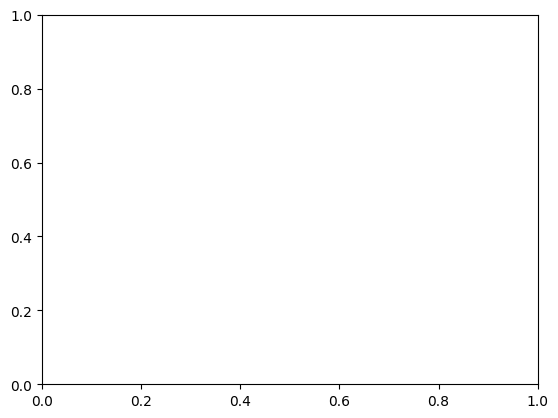

In [35]:
GangFileTags = {'ll':'MllW_jj',
                 'l1':'Ml1W_jj',
                 'l2':'Ml2W_jj'}
CMSFileTags = {'ll': 'mllW_',
               'l1': 'ml1W_',
               'l2': 'ml2W_'}
plotTitles = {'ll': '$M_{llWj}$',
              'l1': '$M_{l1Wj}$',
              'l2': '$M_{l2Wj}$'}
CMS_linspaces = {'ll': np.linspace(100, 660, 15),
                 'l1': np.linspace(70, 480, 21), 
                 'l2': np.linspace(30, 350, 17)}
init_dir = path_to_Gang+gang_diboson_path

for htyp in GangFileTags:
    fig, axes = plt.subplots()
    dattypes = ['WZ', 'ZZ']
    GangFileNames = {dtyp: init_dir+GangFileTags[htyp]+dtyp+'.dat' for dtyp in dattypes}
    datas = {dtyp: get_data(GangFileNames[dtyp]) for dtyp in dattypes}
    theseMasses = diboson_plot(datas, {dtyp:init_dir+f'cut_eff_jj{dtyp}.dat' for dtyp in dattypes})
    Mass_range = get_data(GangFileNames['WZ'], importantColumn=0)
    axes.set_xlabel(plotTitles[htyp]+'[GeV]')
    axes.scatter(Mass_range, theseMasses, label='WZ+ZZ', color='red')

    #now for the CMS data
    CMS_to_plot = get_data(init_dir+CMSFileTags[htyp]+'3.dat') - get_data(init_dir+CMSFileTags[htyp]+'1.dat')
    axes.scatter(CMS_linspaces[htyp], CMS_to_plot, label='1806.10905', color='green')
    axes.legend()
    # axes.scatter()

{'W3j': array([0.011985  , 0.0741573 , 0.181273  , 0.164794  , 0.130337  ,
       0.113109  , 0.0734082 , 0.0621723 , 0.0337079 , 0.0307116 ,
       0.0299625 , 0.0209738 , 0.0164794 , 0.00973783, 0.0104869 ]), 'ttbarJF': array([0.00218723, 0.0726159 , 0.190289  , 0.206474  , 0.160542  ,
       0.111111  , 0.0726159 , 0.0463692 , 0.040245  , 0.0262467 ,
       0.0174978 , 0.019685  , 0.00612423, 0.00874891, 0.00262467])}
{'W3j': array([0.00524345, 0.0164794 , 0.0531835 , 0.0883895 , 0.131086  ,
       0.0951311 , 0.104869  , 0.0779026 , 0.0734082 , 0.0419476 ,
       0.0449438 , 0.0434457 , 0.0337079 , 0.0254682 , 0.023221  ,
       0.0134831 , 0.0172285 , 0.0149813 , 0.00973783, 0.011236  ,
       0.00749064]), 'ttbarJF': array([0.00087489, 0.0104987 , 0.044182  , 0.0949256 , 0.113298  ,
       0.129484  , 0.104549  , 0.0979878 , 0.0721785 , 0.0629921 ,
       0.0494313 , 0.0380577 , 0.0349956 , 0.0253718 , 0.0201225 ,
       0.0170604 , 0.0126859 , 0.0100612 , 0.0104987 , 0.00918635,

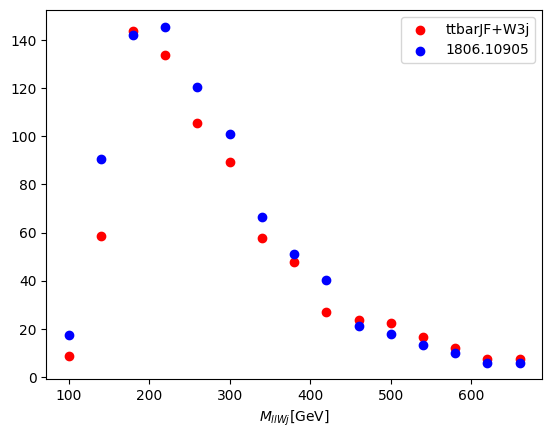

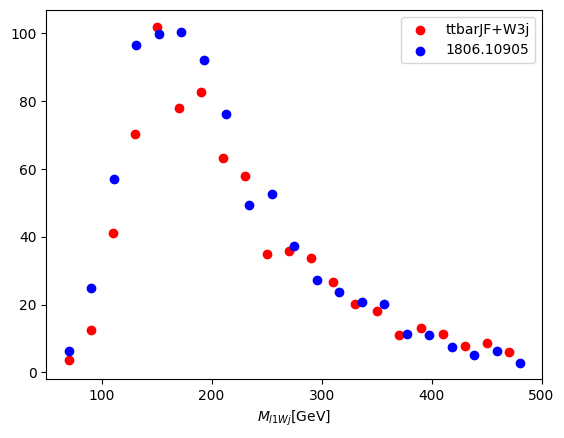

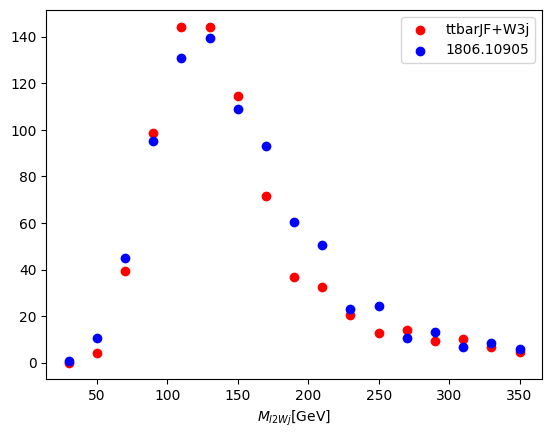

In [48]:
gang_JF_path = 'jetfake_NR_highSR1/'
GangFileTags = {'ll':'MllW_',
                 'l1':'Ml1W_',
                 'l2':'Ml2W_'}
CMSFileTags = {'ll': 'mllW_',
               'l1': 'ml1W_',
               'l2': 'ml2W_'}
plotTitles = {'ll': '$M_{llWj}$',
              'l1': '$M_{l1Wj}$',
              'l2': '$M_{l2Wj}$'}
CMS_linspaces = {'ll': np.linspace(100, 660, 15),
                 'l1': np.linspace(70, 480, 21), 
                 'l2': np.linspace(30, 350, 17)}
init_dir = path_to_Gang+gang_JF_path

for htyp in GangFileTags:
    fig, axes = plt.subplots()
    dattypes = ['W3j', 'ttbarJF']
    GangFileNames = {dtyp: init_dir+GangFileTags[htyp]+dtyp+'_ee.dat' for dtyp in dattypes}
    datas = {dtyp: get_data(GangFileNames[dtyp]) for dtyp in dattypes}
    print(datas)
    theseMasses = JF_plot(datas, {dtyp:init_dir+f'cut_eff_{dtyp}_ee.dat' for dtyp in dattypes})
    Mass_range = get_data(GangFileNames[dattypes[0]], importantColumn=0)
    axes.set_xlabel(plotTitles[htyp]+'[GeV]')
    axes.scatter(Mass_range, theseMasses, label='ttbarJF+W3j', color='red')

    #now for the CMS data
    CMS_to_plot = get_data(init_dir+CMSFileTags[htyp]+'3.dat') - get_data(init_dir+CMSFileTags[htyp]+'1.dat')
    axes.scatter(CMS_linspaces[htyp], CMS_to_plot, label='1806.10905', color='blue')
    axes.legend()

In [49]:
Mass_range = get_data(WZ_Gang_raw_mllWj_file_name, importantColumn=0)
WZ_eff_path = path_to_Gang+gang_diboson_path+'cut_eff_jjWZ.dat'
ZZ_eff_path = path_to_Gang+gang_diboson_path+'cut_eff_jjZZ.dat'
MllWjj_to_plot = diboson_plot(ZZ_MllWj_raw_Masses, WZ_MllWj_raw_Masses, WZ_eff_path, ZZ_eff_path)
print(Mass_range)
print(MllWjj_to_plot)
plt.scatter(Mass_range, MllWjj_to_plot)

NameError: name 'WZ_Gang_raw_mllWj_file_name' is not defined

[ 17.5  90.5 142.  145.5 120.5 101.   66.5  51.   40.5  21.   18.   13.5
  10.    6.    6. ]


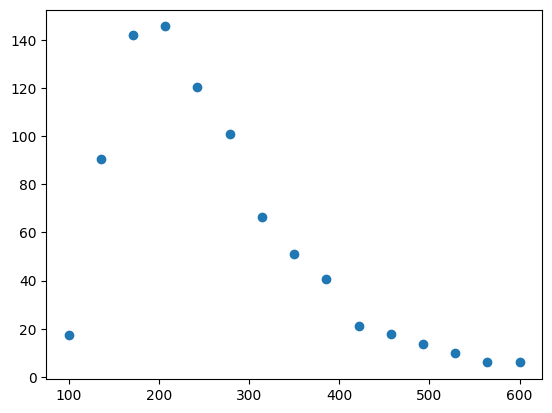

In [ ]:
print(CMS_to_plot)
plt.scatter(np.linspace(100, 600, 15), CMS_to_plot)